<a href="https://colab.research.google.com/github/nobobobo/ml-handson/blob/master/digits_recognition_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recognize handwritten digits with scikit-learn

# Feature Engineering

## Import dataset

In [0]:
from sklearn import datasets
digits = datasets.load_digits()

## Display data

In [2]:
# print raw data with its dimension and shape
print(digits.data)
print('Dim: ', digits.data.ndim)
print('Shape: ', digits.data.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
Dim:  2
Shape:  (1797, 64)


In [3]:
# print target
print(digits.target)

[0 1 2 ... 8 9 8]


In [4]:
# print raw data at index of 5
print(digits.data[5])

[ 0.  0. 12. 10.  0.  0.  0.  0.  0.  0. 14. 16. 16. 14.  0.  0.  0.  0.
 13. 16. 15. 10.  1.  0.  0.  0. 11. 16. 16.  7.  0.  0.  0.  0.  0.  4.
  7. 16.  7.  0.  0.  0.  0.  0.  4. 16.  9.  0.  0.  0.  5.  4. 12. 16.
  4.  0.  0.  0.  9. 16. 16. 10.  0.  0.]


## Visualize data

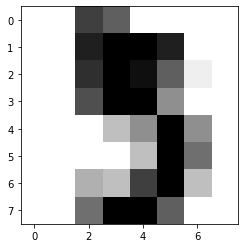

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt

plt.imshow(digits.images[5], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

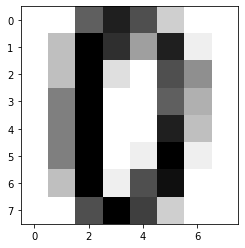

In [6]:
plt.imshow(digits.images[30], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

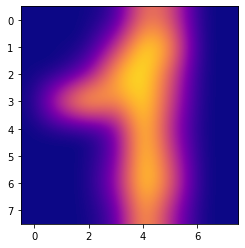

In [7]:
plt.imshow(digits.images[47], cmap='plasma', interpolation='bicubic')
plt.show()

## Visualize multiple data

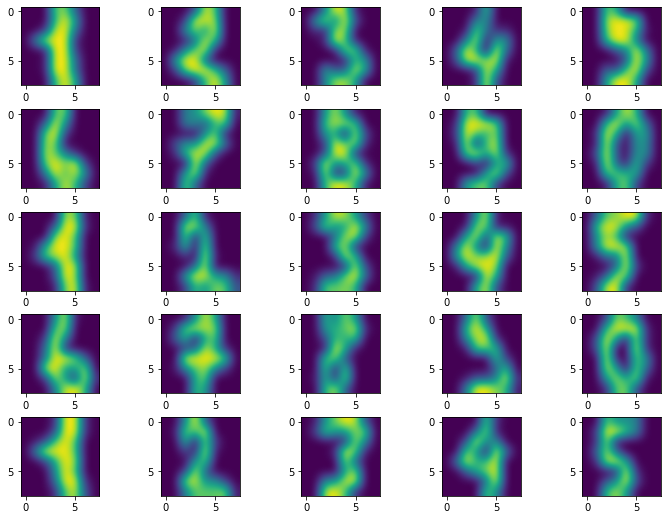

In [14]:
import numpy as np 

# create numbers of rows and cols 
ROWS_COUNT = 5 
COLUMNS_COUNT = 5
DIGIT_GRAPH_COUNT = ROWS_COUNT * COLUMNS_COUNT


# create figures 
subfig = []

# x = np.linspace(-1,1,10)

fig = plt.figure(figsize=(12,9))

for i in range (1, DIGIT_GRAPH_COUNT+1):
  subfig.append(fig.add_subplot(ROWS_COUNT, COLUMNS_COUNT, i))

  # y = x**i

  subfig[i-1].imshow(digits.images[i], interpolation='bicubic', cmap='viridis')

fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()


## View data in 3-D graph

In [0]:
# load data
from sklearn import decomposition

digits = datasets.load_digits()

all_features = digits.data
teacher_labels = digits.target

In [0]:
# define getColor function for each teacher_labels
# which returns a corresponding color for visualization

def getColor(color):
  if color == 0:
    return 'red'
  elif color == 1:
    return 'orange'
  elif color == 2:
    return 'yellow'
  elif color == 3:
    return 'greenyellow'
  elif color == 4:
    return 'green'
  elif color == 5:
    return 'cyan'
  elif color == 6:
    return 'blue'
  elif color == 7:
    return 'navy'
  elif color == 8:
    return 'purple'
  else:
    return 'black'

In [26]:
# using PCA to decompose the images to 3 variables

pca = decomposition.PCA(n_components=3)

three_features = pca.fit_transform(all_features)

print(three_features.shape)

(1797, 3)


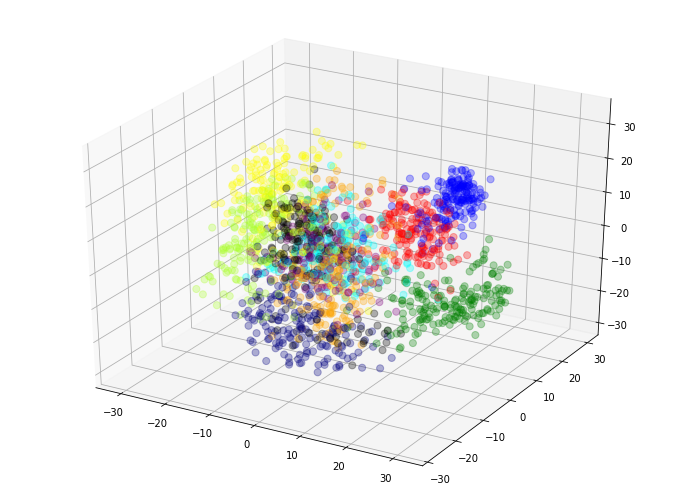

In [27]:
# plot 3d scatter graph

fig = plt.figure(figsize=(12,9))

subfig = fig.add_subplot(111, projection = '3d')

colors = list(map(getColor, teacher_labels))

subfig.scatter(three_features[:, 0], three_features[:,1], three_features[:,2],
               s = 50, c=colors, alpha=0.3)

plt.show()